In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


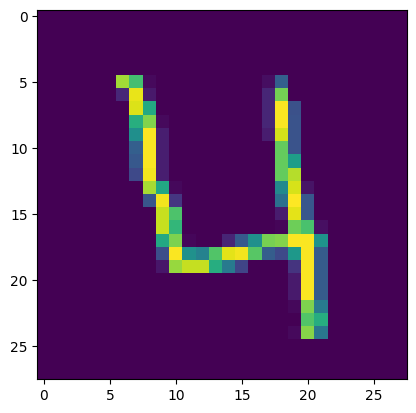

In [6]:
plt.imshow(train.iloc[3,1:].values.reshape(28,28))

In [7]:
df = train

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
import time
from sklearn.metrics import accuracy_score
start = time.time()
print(accuracy_score(y_test,knn.predict(X_test)))
print(time.time()-start)

0.9648809523809524
13.502536535263062


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=200) # in NONE same no of column will get

In [14]:
X.shape

(42000, 784)

In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [17]:
X_train_trf.shape

(33600, 200)

In [18]:
# X_train_trf = scaler.fit_transform(X_train_trf)
# X_test_trf = scaler.fit_transform(X_test_trf)
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
start = time.time()
print(accuracy_score(y_test,knn.predict(X_test_trf)))
print(time.time()-start)

0.30095238095238097
2.7065930366516113


In [19]:
l = []
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    
    
    l.append(accuracy_score(y_test,knn.predict(X_test_trf)))
    

In [20]:
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [21]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y = X_train_trf[:,1],
                color = y_train_trf
                )
fig.show()

In [22]:
pca.explained_variance_
#eigen value

array([332483.683031  , 250952.54912218])

In [23]:

pca.components_

array([[ 7.76965135e-18,  3.50989291e-18, -2.53253578e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.72020041e-17,  2.08218564e-17, -4.60832055e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

# finding optimum no of PC
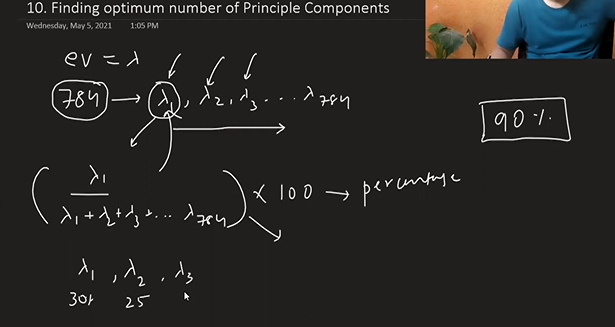